### prophet model from facebook to be used in time series analysis

In [22]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr



In [23]:
# import the dataset 
df = pd.read_csv("./datasets/DailyDelhiClimateTrain.csv", index_col="date", parse_dates=True)

# getting general information
print(df.head())
print(df.info())
print(df.describe())


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802

<AxesSubplot:xlabel='date', ylabel='meantemp'>

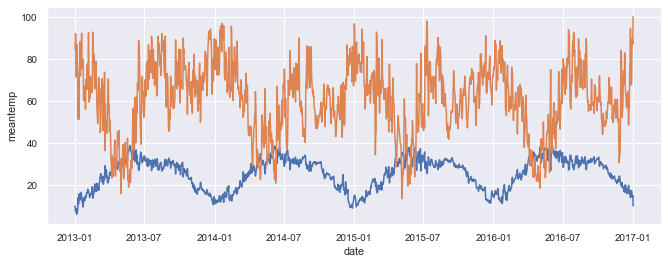

In [24]:
# line plot 
sns.set(rc={'figure.figsize':(11,4)}, font_scale = 0.9, style='darkgrid')
sns.lineplot(data=df, x="date", y = "meantemp")
sns.lineplot(data=df, x="date", y = "humidity")

In [31]:
# same plot on plotly
fig = px.line(df,x=df.index, y="meantemp", title="Mean Temperature")
fig.add_scatter(df, x=df.index, y="humidity", name= "Humidity")
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'y' property of scatter
        Received value: 'humidity'

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [25]:
# scatter plot between meantemp and humidity
fig = px.scatter(df, x="meantemp", y="humidity", title="Mean Temp vs Humidity",trendline="ols", trendline_color_override="red")
fig.show()

In [29]:
corr,_ =pearsonr(df['meantemp'],df['humidity'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.572
